## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

import joblib


# Modeling

### Train 6 ML algorithm:
* Gaussian Naive Bayes 
* Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* XGBoost


### 1) Load data

In [2]:

Train = pd.read_csv('../input/Train.csv', index_col='id')
Val = pd.read_csv('../input/Val.csv', index_col='id')
Test = pd.read_csv('../input/Test.csv', index_col='id')

df00_not_norm = pd.read_csv('../input/df_not_norm.csv', index_col='id')

Train.head()

,loan_amnt,term,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,bc_open_to_buy,num_op_rev_tl,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,target
id,,,,,,,,,,,,,,
105253408,0.179897,-0.564595,0.289061,0.119112,0.231563,0.410550,2.617142,-0.612313,-1.188055,1,0,0,0,1
16592425,0.546808,1.771181,0.000214,-0.183949,-0.964507,0.069240,-1.046230,0.647751,1.963171,0,0,1,0,0
58470345,-0.966701,-0.564595,0.289061,-0.637249,0.967607,-1.046003,-0.679893,-0.678597,-1.188055,0,0,0,1,0
10092824,-0.508062,-0.564595,0.289061,1.013113,-0.596485,-0.662140,0.785456,7.479804,5.789659,1,0,0,0,0
65965690,0.753196,-0.564595,1.127005,0.930595,-2.068572,0.227040,-0.130387,0.558573,-0.287704,1,0,0,0,1


### 2) Split X and y

In [3]:
X_train = Train.drop(['target'], axis=1)
y_train = Train['target']


X_val = Val.drop(['target'], axis=1)
y_val = Val['target']


X_test = Test.drop(['target'], axis=1)
y_test = Test['target']

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape



((807186, 13), (807186,), (269062, 13), (269062,), (269062, 13), (269062,))

In [4]:
X_train.head()

,loan_amnt,term,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,bc_open_to_buy,num_op_rev_tl,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT
id,,,,,,,,,,,,,
105253408,0.179897,-0.564595,0.289061,0.119112,0.231563,0.410550,2.617142,-0.612313,-1.188055,1,0,0,0
16592425,0.546808,1.771181,0.000214,-0.183949,-0.964507,0.069240,-1.046230,0.647751,1.963171,0,0,1,0
58470345,-0.966701,-0.564595,0.289061,-0.637249,0.967607,-1.046003,-0.679893,-0.678597,-1.188055,0,0,0,1
10092824,-0.508062,-0.564595,0.289061,1.013113,-0.596485,-0.662140,0.785456,7.479804,5.789659,1,0,0,0
65965690,0.753196,-0.564595,1.127005,0.930595,-2.068572,0.227040,-0.130387,0.558573,-0.287704,1,0,0,0


### Model 1) Gaussian Naive Bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


In [5]:
# 1) Gaussian Naive Bayes


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)


GaussianNB()

### Model 2) Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [6]:
# 2) Logistic Regression

logreg = LogisticRegression(penalty='l2', 
                            dual=False, 
                            tol=0.0001, 
                            C=1, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=None, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=1)
logreg.fit(X_train, y_train)



LogisticRegression(C=1, multi_class='ovr', n_jobs=1, solver='liblinear')

### Model 3) Decision Tree
https://scikit-learn.org/stable/modules/tree.html

In [7]:
#Decision Tree

dectree = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=4, 
                                 min_samples_split=2, 
                                 min_samples_leaf=2, 
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None, 
                                 random_state=None, 
                                 max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, 
                                 class_weight=None)
dectree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

### Model 4) Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
# Random Forest

rndforest = RandomForestClassifier(n_estimators=10, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='sqrt', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, 
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=None, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)
rndforest.fit(X_train, y_train)



RandomForestClassifier(max_depth=3, n_estimators=10)

### Model 5) Gradient Boosting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [9]:
# Gradient Boosting Classifier

gbc = GradientBoostingClassifier(loss='log_loss', 
                                 learning_rate=0.1,
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse',
                                 min_samples_split=2, 
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0, 
                                #  min_impurity_split=None, 
                                 init=None, 
                                 random_state=None,
                                 max_features=None,
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                #  presort='auto',
                                 validation_fraction=0.2, 
                                 n_iter_no_change=None,
                                 tol=0.0001)

gbc.fit(X_train, y_train)


GradientBoostingClassifier(validation_fraction=0.2)

### Model 6) XGBoost


In [10]:


xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification tasks
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_child_weight=1,           # similar to min_samples_leaf
    max_depth=3,
    gamma=0.0,                    # similar to min_impurity_decrease
    random_state=None,
    colsample_bytree=1.0,         # similar to max_features
    verbosity=1,                  # similar to verbose (1 for messages, 0 for silent)
    # early_stopping_rounds=10,     # similar to n_iter_no_change
    nthread=-1,                   # to use all available threads
    booster='gbtree'              # use gradient boosted trees as default
)

xgb_classifier.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train)], 
    eval_metric='logloss',        # for binary classification
    verbose=True,                 # print messages during training
    early_stopping_rounds=10      # stop if performance doesn't improve after 10 rounds
)



[0]	validation_0-logloss:0.65603
[1]	validation_0-logloss:0.62574
[2]	validation_0-logloss:0.60085
[3]	validation_0-logloss:0.58024
[4]	validation_0-logloss:0.56308
[5]	validation_0-logloss:0.54876
[6]	validation_0-logloss:0.53679
[7]	validation_0-logloss:0.52672
[8]	validation_0-logloss:0.51826
[9]	validation_0-logloss:0.51114
[10]	validation_0-logloss:0.50515
[11]	validation_0-logloss:0.50008
[12]	validation_0-logloss:0.49579
[13]	validation_0-logloss:0.49216
[14]	validation_0-logloss:0.48910
[15]	validation_0-logloss:0.48650
[16]	validation_0-logloss:0.48428
[17]	validation_0-logloss:0.48240
[18]	validation_0-logloss:0.48079
[19]	validation_0-logloss:0.47940
[20]	validation_0-logloss:0.47821
[21]	validation_0-logloss:0.47716
[22]	validation_0-logloss:0.47627
[23]	validation_0-logloss:0.47545
[24]	validation_0-logloss:0.47475
[25]	validation_0-logloss:0.47414
[26]	validation_0-logloss:0.47355
[27]	validation_0-logloss:0.47306
[28]	validation_0-logloss:0.47261
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

## Model Evaluation

#### ROC curve

In [11]:

def plot_roc_curves(X, y, models, model_names, info, figsize=(12,8)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    info (string): info about validation or test dataset. 'validation' or 'test'
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)
    models_ = []
    roc_auc_ = []
    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)
        models_.append(model_names[i])
        roc_auc_.append(roc_auc) 
    

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=15, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 15})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=20)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
#     plt.show()
    return (
    pd.DataFrame(data={
        'Models':models_,
        'AUC_'+info:roc_auc_,
    })
    )

,Models,AUC_validation
0,Gaussian Naive Bayes,0.659087
1,Logistic Regression,0.670631
2,Decision Tree,0.651922
3,RandomForest,0.660301
4,Gradient Boosting,0.685897
5,XGBoost,0.685422


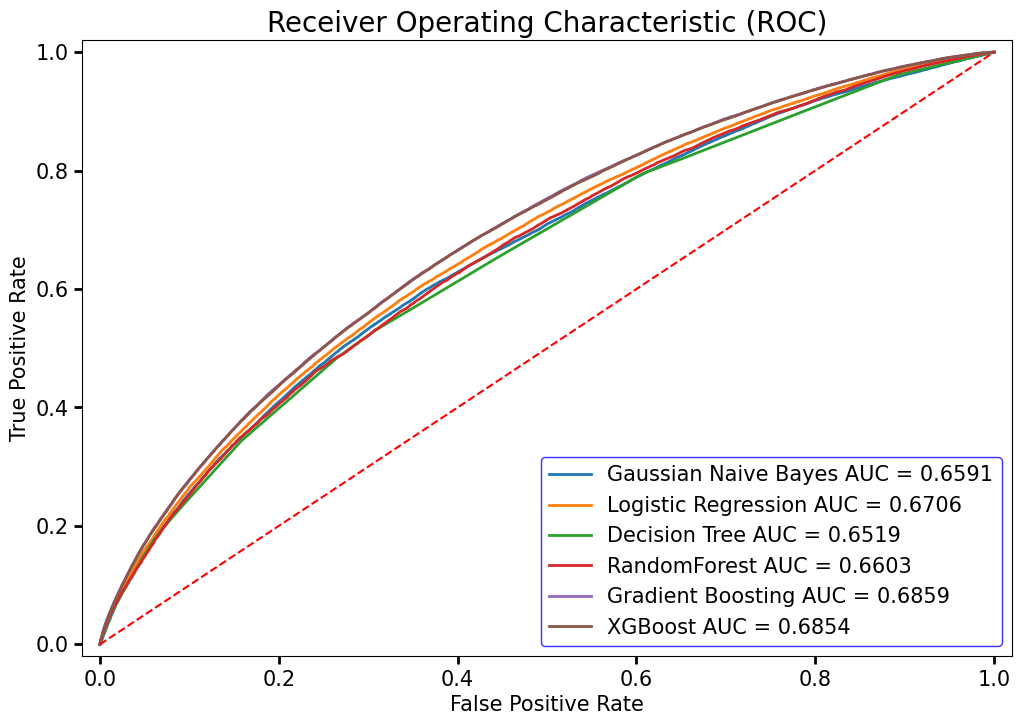

In [12]:
# Define the list of models to compare
models = [gaussian, logreg, dectree, rndforest, gbc, xgb_classifier]
model_names = ['Gaussian Naive Bayes','Logistic Regression', 'Decision Tree', 'RandomForest', 'Gradient Boosting', 'XGBoost']
# Plot ROC curves for in-sample data
val_roc_auc = plot_roc_curves(X_val, y_val, models, model_names, info='validation')
val_roc_auc

,Models,AUC_test
0,Gaussian Naive Bayes,0.659490
1,Logistic Regression,0.671052
2,Decision Tree,0.651497
3,RandomForest,0.661041
4,Gradient Boosting,0.685603
5,XGBoost,0.685138


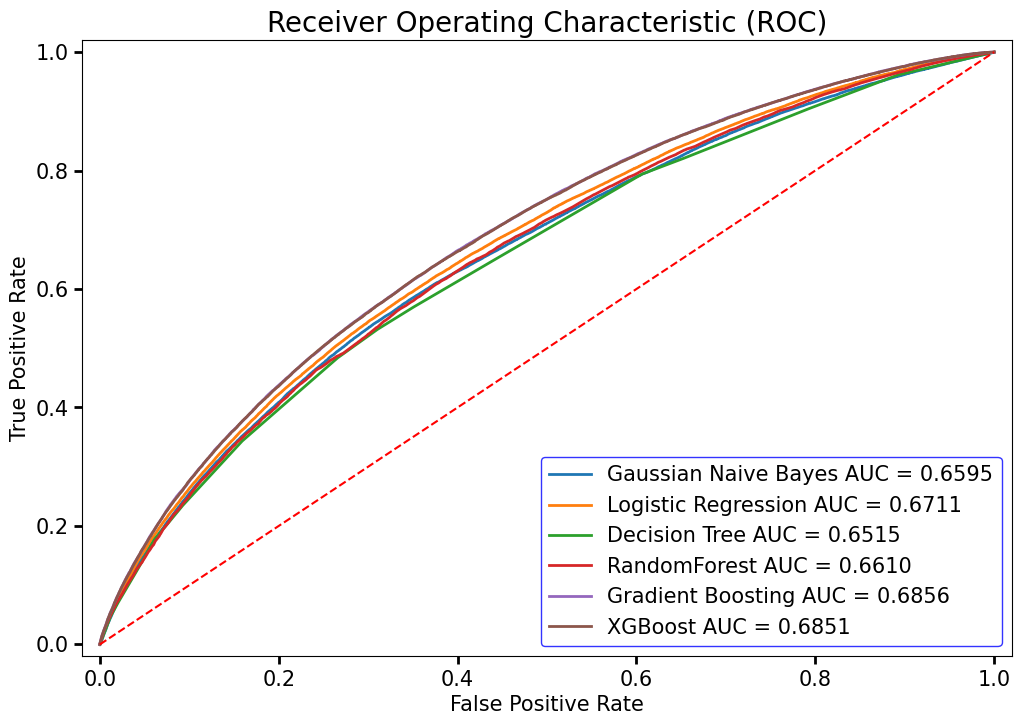

In [13]:
# Plot ROC curves for out-of-sample data
test_roc_auc = plot_roc_curves(X_test, y_test, models, model_names, info='test')
test_roc_auc

## Best ROC AUC Model

In [14]:
pd.merge(val_roc_auc,test_roc_auc,how='left',on='Models').sort_values(by='AUC_test',ascending=False)

,Models,AUC_validation,AUC_test
4,Gradient Boosting,0.685897,0.685603
5,XGBoost,0.685422,0.685138
1,Logistic Regression,0.670631,0.671052
3,RandomForest,0.660301,0.661041
0,Gaussian Naive Bayes,0.659087,0.659490
2,Decision Tree,0.651922,0.651497


### Optimal threshold

In [15]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_val, y_predict)
        acc = accuracy_score(y_val, y_predict)
        rec = recall_score(y_val, y_predict)
        pre = precision_score(y_val, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [16]:


# Create an empty list to store the results
chart = list()

# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
# chart.to_csv('model_evaluation_scores.csv')
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Gaussian Naive Bayes,0.210526,0.388477,0.602199,0.632950,0.280237
1,Logistic Regression,0.210526,0.395862,0.664044,0.551367,0.308776
2,Decision Tree,0.210526,0.379801,0.684809,0.483449,0.312750
3,RandomForest,0.210526,0.382100,0.669667,0.511636,0.304904
4,Gradient Boosting,0.210526,0.405440,0.670641,0.562537,0.316932
5,XGBoost,0.210526,0.405479,0.668155,0.566875,0.315618


### Confusion Matrix

In [17]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    buyer_confusion = confusion_matrix(y_val, y_predict)
    
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(buyer_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Buyer', 'Buyer'],
           yticklabels=['Not Buyer', 'Buyer']);
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = buyer_confusion[0][0]
    FP = buyer_confusion[0][1]
    FN = buyer_confusion[1][0]
    TN = buyer_confusion[1][1]

    tot = TP+FP+FN+TN
    print(FN/(tot),TN/(tot), FN/(tot) + TN/(tot))
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',
            # fontname = '.SF Compact Display',
            fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [18]:
def make_confusion_matrix_test(model, info='num', threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - info: plot num or perc in confusion matrix
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)

    # Generate confusion matrix
    buyer_confusion = confusion_matrix(y_test, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    if info=='num':
        sns.heatmap(buyer_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                    xticklabels=['Not Buyer', 'Buyer'],
                    yticklabels=['Not Buyer', 'Buyer'])
    else:
        sns.heatmap(buyer_confusion/np.sum(buyer_confusion), cmap=plt.cm.Blues, annot=True, 
                    square=True, 
                    fmt='.3%',
                    xticklabels=['Not Buyer', 'Buyer'],
                    yticklabels=['Not Buyer', 'Buyer'])

    # Calculate TP, FP, FN, TN
    TP = buyer_confusion[0][0]
    FP = buyer_confusion[0][1]
    FN = buyer_confusion[1][0]
    TN = buyer_confusion[1][1]
    
    tot = TP+FP+FN+TN
    print(round(100*FN/(tot),2),round(100*TN/(tot),2), round(100*(FN/(tot) + TN/(tot)),2))
    
    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', 
    fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

### Confusion Matrix for Random Forest 

0.09749054121354929 0.10213631059012421 0.1996268518036735


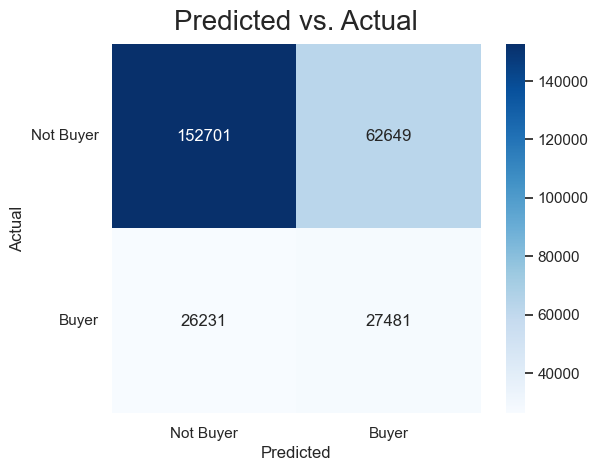

In [19]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.474 on the validation data
make_confusion_matrix_val(rndforest, threshold=0.210526)

# Save the plot as PNG file
# plt.savefig('confusion_matrix_val_random_forest.png');

9.72 10.25 19.96


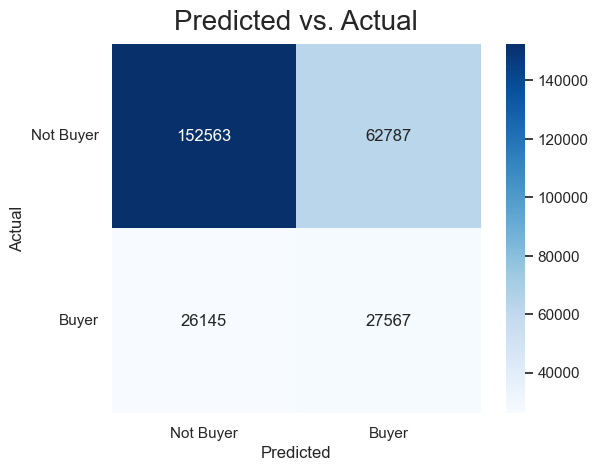

In [20]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rndforest, threshold=0.210526)

9.72 10.25 19.96


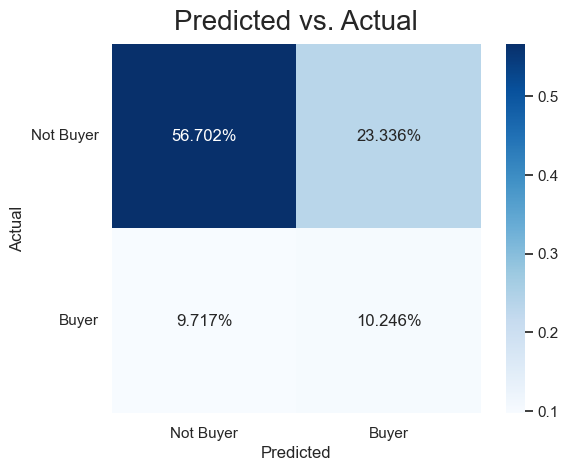

In [21]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rndforest, info='perc', threshold=0.210526)

### Confusion Matrix for XGBoost 

0.08646334302131108 0.11316350878236243 0.1996268518036735


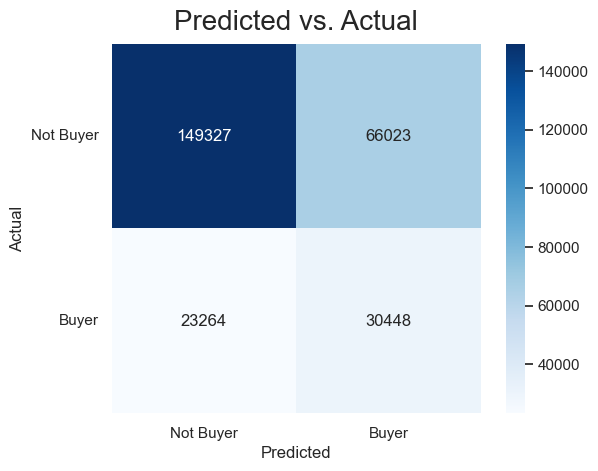

In [22]:
# Create a confusion matrix 
make_confusion_matrix_val(xgb_classifier, threshold=0.210526)

8.61 11.35 19.96


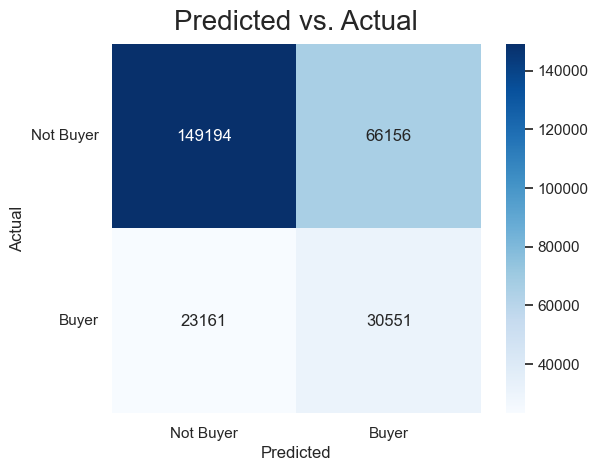

In [23]:
make_confusion_matrix_test(xgb_classifier, threshold=0.210526)

8.61 11.35 19.96


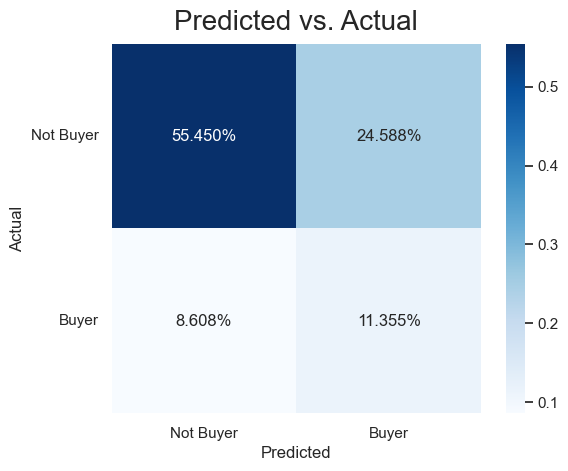

In [24]:
make_confusion_matrix_test(xgb_classifier,info='perc', threshold=0.210526)

### Confusion Matrix for Gradient Boosting

0.08732931443310464 0.11229753737056887 0.1996268518036735


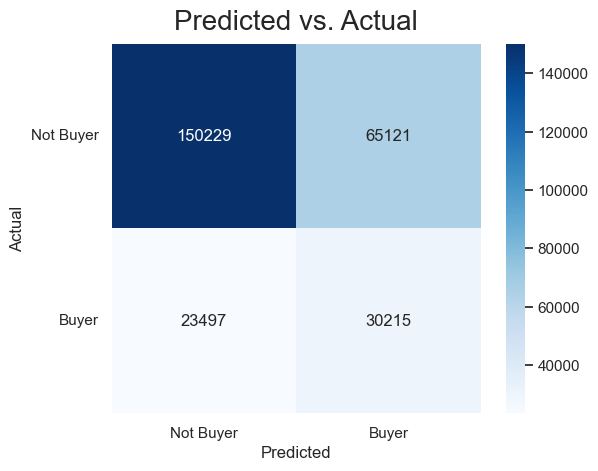

In [25]:
# Create a confusion matrix 
make_confusion_matrix_val(gbc, threshold=0.210526)

8.69 11.27 19.96


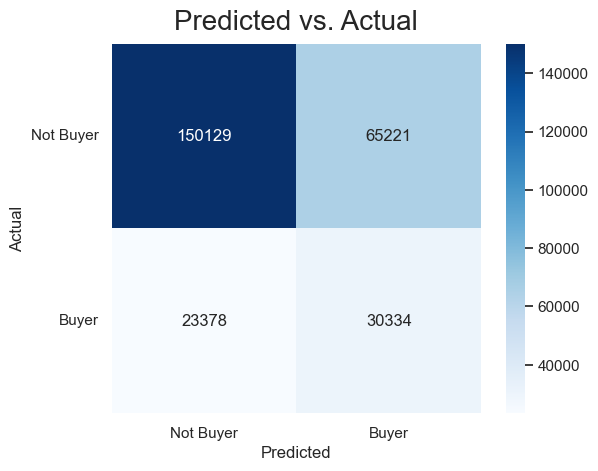

In [26]:
# Generate confusion matrix 
make_confusion_matrix_test(gbc, threshold=0.210526)


8.69 11.27 19.96


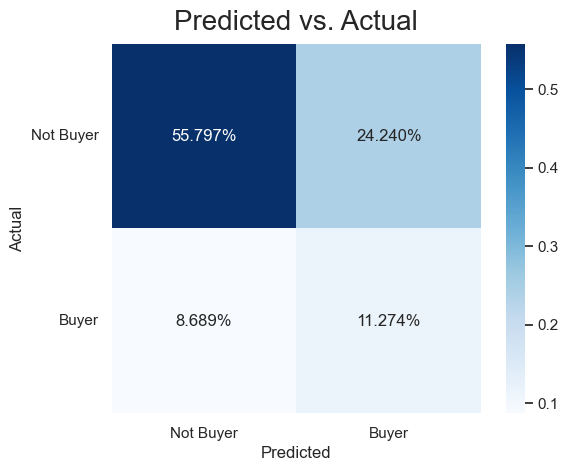

In [27]:
# Generate confusion matrix 
make_confusion_matrix_test(gbc, info='perc',threshold=0.210526)


8.92 11.05 19.96


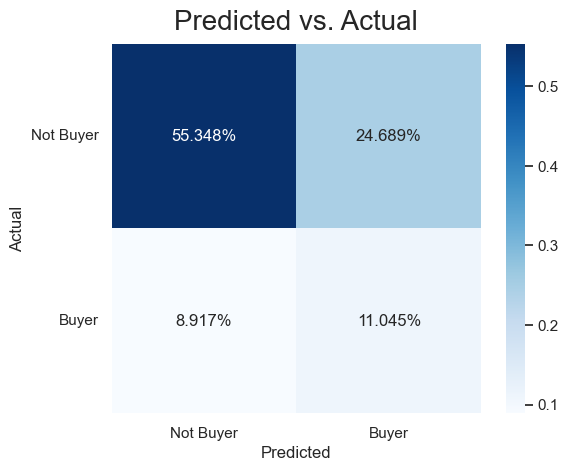

In [28]:
# Generate confusion matrix 
make_confusion_matrix_test(logreg, info='perc',threshold=0.210526)


## Choose the Best Model

In [29]:
import sklearn

print(sklearn.__version__)


1.4.1.post1


In [45]:
best_model = xgb_classifier ## this works.
# best_model = gbc ## this works.

In [46]:
import joblib
print(joblib.__version__)
models_names_short = ['gaussian', 'logreg', 'dectree', 'rndforest', 'gbc', 'xgb_classifier']
for i, model in enumerate(models):
    if model == best_model:
        # save best model;
        joblib.dump(model, "../artifacts/best_model.joblib") 

    else:
        joblib.dump(model, "../artifacts/" + models_names_short[i] + "_model.joblib") 

features_used_to_train = X_train.columns.tolist()
joblib.dump(features_used_to_train, "../artifacts/features_used_to_train.joblib") 


1.3.2


['../artifacts/features_used_to_train.joblib']

In [47]:
import sys
print(sys.version)


3.9.17 (main, Jun 20 2023, 17:20:08) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]


## Adding results to Train, Val and Test dataframe

In [48]:
# Train
Train['y_pred'] = best_model.predict(X_train)
Train['y_score'] = best_model.predict_proba(X_train)[:,1]

# Validation
Val['y_pred'] = best_model.predict(X_val)
Val['y_score'] = best_model.predict_proba(X_val)[:,1]

# Test
Test['y_pred'] = best_model.predict(X_test)
Test['y_score'] = best_model.predict_proba(X_test)[:,1]


## Saving Train, Val and Test datraframe with results.

In [49]:
Train.to_csv('../input/Train_after_modeling.csv', sep=',', encoding='utf-8',index=True)
Val.to_csv('../input/Val_after_modeling.csv', sep=',', encoding='utf-8',index=True)
Test.to_csv('../input/Test_after_modeling.csv', sep=',', encoding='utf-8',index=True)

## Explain ML Model

#### Feature Importance

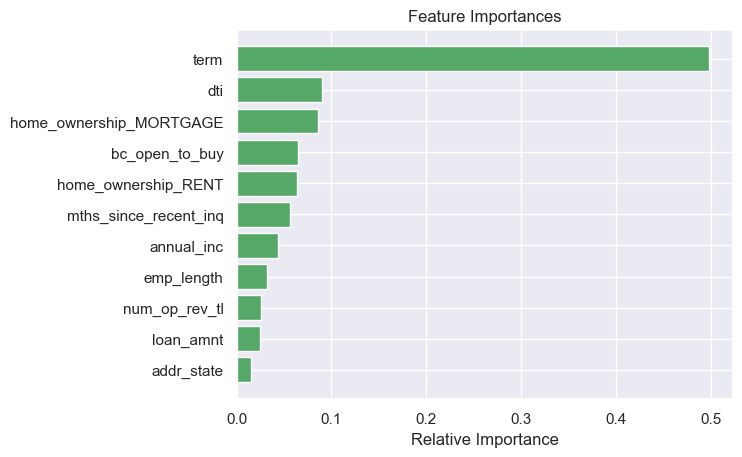

In [50]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns.tolist()
plt.title('Feature Importances')
j = 11 # top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
#plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

### Shap Importance

In [51]:
import shap

In [52]:
# compute SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

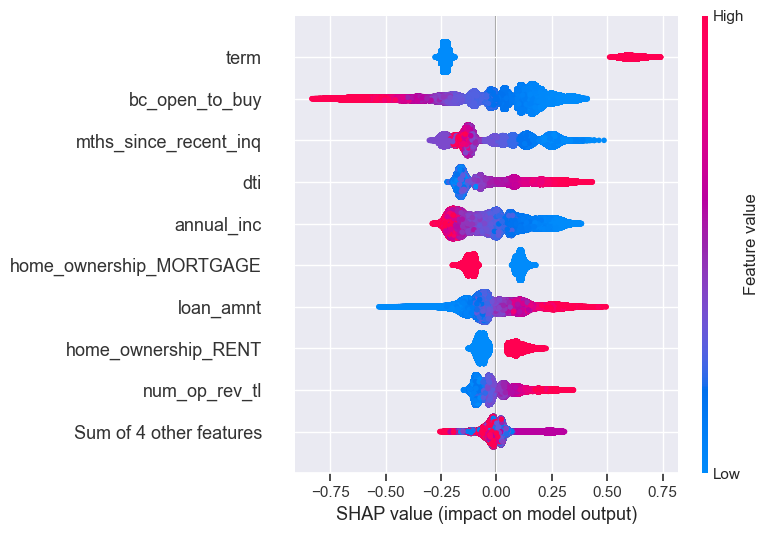

2024-02-26 17:10:42.179 
  command:

    streamlit run /Users/rafaelr/MyProjects/loan_bank_model_project_v1/env_loan_bank/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [62]:
import streamlit as st
from streamlit_shap import st_shap

# compute SHAP values
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train)

st_shap(shap.plots.beeswarm(shap_values), height=300)

## Para um individuo apenas!!

In [77]:
X_train.head(2)

,loan_amnt,term,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,bc_open_to_buy,num_op_rev_tl,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT
id,,,,,,,,,,,,,
105253408,0.179897,-0.564595,0.289061,0.119112,0.231563,0.41055,2.617142,-0.612313,-1.188055,1,0,0,0
16592425,0.546808,1.771181,0.000214,-0.183949,-0.964507,0.06924,-1.046230,0.647751,1.963171,0,0,1,0


In [80]:
df00_not_norm.loc[16592425]

loan_amnt                  19200.000000
term                           2.000000
emp_length                     5.965873
annual_inc                 62960.000000
addr_state                    30.000000
dti                           19.060000
mths_since_recent_inq          1.000000
bc_open_to_buy             19930.000000
num_op_rev_tl                 17.000000
home_ownership_MORTGAGE        0.000000
home_ownership_OTHERS          0.000000
home_ownership_OWN             1.000000
home_ownership_RENT            0.000000
target                         0.000000
Name: 16592425, dtype: float64

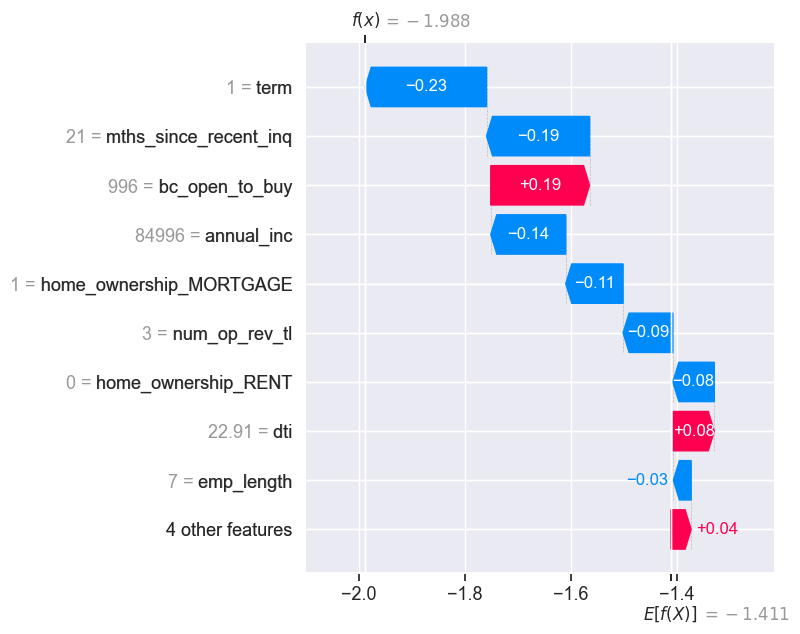

DeltaGenerator()

In [87]:
# Calcular os valores SHAP para uma única instância
# instance_index = 0  # Índice da instância que você deseja explicar
id = 105253408
# shap_values_instance = explainer(np.expand_dims(X_train.values[instance_index], axis=0))
shap_values_instance = explainer(np.expand_dims(X_train.loc[id].values, axis=0))

# Criar um objeto Explanation que inclui os nomes das features
explanation = shap.Explanation(
    values=shap_values_instance.values[0],  # Valores SHAP para a instância
    base_values=shap_values_instance.base_values[0],  # Valor base
    # data=X_train.iloc[instance_index],  # Dados da instância
    data=df00_not_norm.loc[id],
    feature_names=X_train.columns  # Nomes das features
)

# Gerar e exibir o gráfico de cascata com os nomes das features
st_shap(shap.plots.waterfall(explanation), height=300)

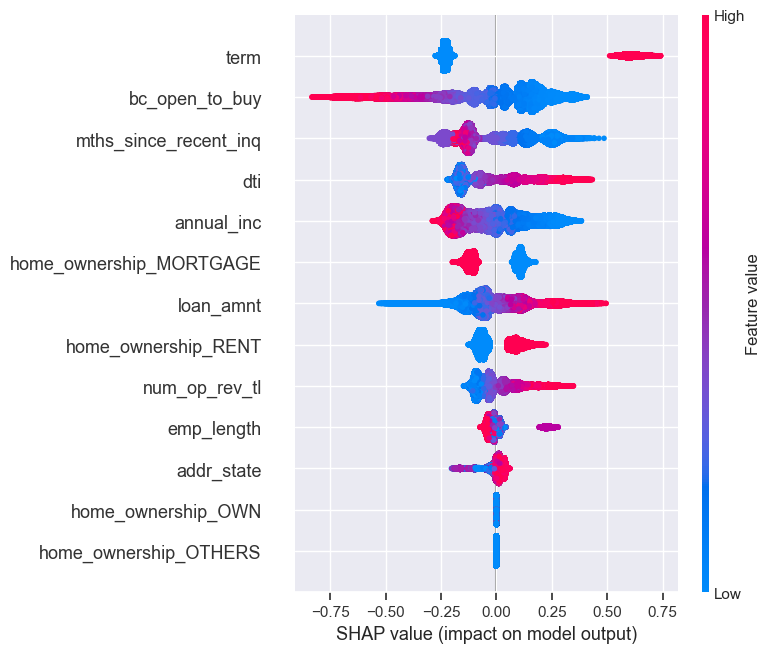

In [53]:
shap.summary_plot(shap_values, X_train.values, feature_names = X_train.columns)

In [54]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((807186, 13), (807186,), (269062, 13), (269062,), (269062, 13), (269062,))

In [55]:
# compute SHAP values
explainer_t = shap.TreeExplainer(best_model)
shap_values_t = explainer.shap_values(X_test)

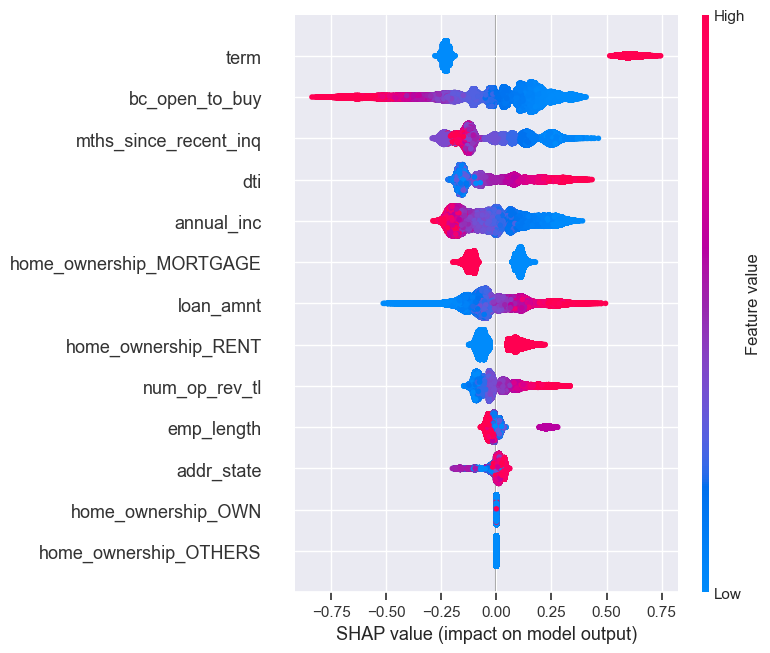

In [56]:
shap.summary_plot(shap_values_t, X_test.values, feature_names = X_test.columns)

### Selecting features
- loan_amnt - The listed amount of the loan applied by the borrower.
- term - The number of payments on the loan, where values are in months and can be either 36 or 60.
- int_rate - The interest rate on the loan
- sub_grade - Assigned loan subgrade score based on borrower's credit history
- emp_length - Borrow's employment length in years.
- home_ownership - The homeownership status provided by the borrower (eg rent, own, mortgage, etc)
- annual_inc - The self-reported annual income provided by the borrower
- addr_state - The state provided by the borrower in the loan application
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borrower’s monthly income.
- mths_since_recent_inq - Months since most recent inquiry
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- bc_open_to_buy - Total open to buy on revolving bankcards
- bc_util - Ratio of total current balance to high credit/credit limit for all bankcard accounts
- num_op_rev_tl - Number of open revolving accounts
- loan_status - Current status of the loan (eg fully paid or charged off), this is the label we are going to predict with the model.

### Explain Features and yours values.
- loan with 60 months have higher probability to have Charge Off status in future.
- For lower values on bc_open_to_buy, mths_since_recent_inq and annual_inc have more probability of Charge Off status in future.
- For higher values on dti, loan_amount and num_op_rev_tl there are higher probability of Charge Off status in future.
- There are higher probability of Charge Off status for Borrowers dont have Mortage or have Rent status.  


In [79]:
## stop here!!